In [2]:
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import astropy as ay
import astropy.units as ay_u
import astropy.coordinates as ay_coord

import magnetic_field_functions_2d as mff2d
import magnetic_field_functions_3d as mff3d
import model_observing as m_obs
import data_systematization as d_systize

# %load_ext line_profiler
# %matplotlib notebook


In [3]:
def mag_field(x,y,z):
    h = 0.3257
    k_array = [0.9549,0.4608,0.6320]
    disk_radius = 3.8918
    uniform_B0 = 3.3118    
    return mff3d.hourglass_magnetic_field_cart_3d(x, y, z,
                                                  h, k_array, disk_radius, uniform_B0,
                                                  center=[0, 0, 0])

def cloud_eq(x,y,z):
    radius = 1
    return x**2 + y**2 + z**2 - radius

def test_field(x,y,z):
    return 0,1,0

center_coord = ay_coord.SkyCoord('20h40m00.00s','42d00m00.00s',frame='icrs')
field_of_view = 0.01745329

print(center_coord)
n_zeros = 10

<SkyCoord (ICRS): (ra, dec) in deg
    (310., 42.)>


target_object = m_obs.ProtostarModel(center_coord,cloud_eq,test_field,ra_wrap_angle=np.pi)
target_sightline = m_obs.Sightline(None,None,Skycord_object=center_coord,ra_wrap_angle=np.pi)


telescope_data = m_obs.ObservingRun(target_object,target_sightline,3)
_ = telescope_data.Stokes_parameter_contours(n_samples=100) # Res is n_samples

## Multiple Plots

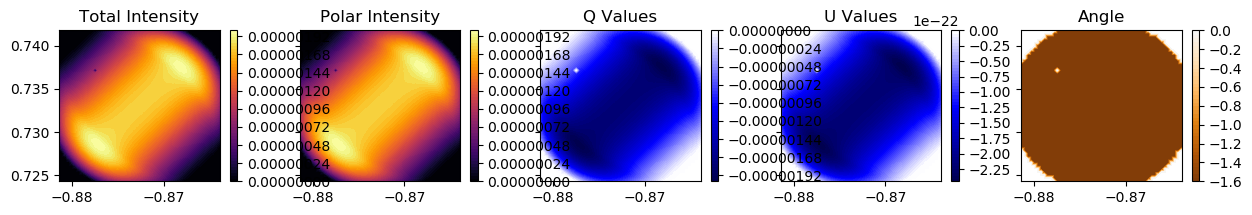

Delta time :  89.15234017372131


In [5]:
def cloud_eq_0(x,y,z):
    radius = 0.01**2
    return x**2 + y**2 + z**2 - radius

def test_field_0(x,y,z):
    return np.zeros_like(x),np.ones_like(x),np.zeros_like(x)

def intensity_field_0(x,y,z):
    return x+y+z

target_object_0 = m_obs.ProtostarModel(center_coord,cloud_eq_0,test_field_0,density_model=intensity_field_0,
                                       zeros_guess_count=n_zeros)
target_sightline_0 = m_obs.Sightline(None,None,SkyCoord_object=center_coord)

telescope_data_0 = m_obs.ObservingRun(target_object_0,target_sightline_0,field_of_view)

start_time = time.time()
_ = telescope_data_0.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)


In [4]:
a,b = _
print(min(b[2])) # Was 821

0.0


0.0
1.0
1.0
0.0 2.4477398763437847e-16
-3.9974625794931185 0.0


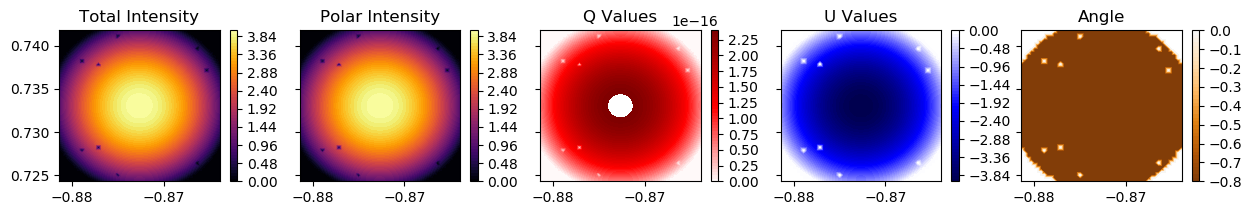

Delta time :  55.549781799316406


In [8]:
def cloud_eq_45(x,y,z):
    radius = 0.01**2
    return x**2 + y**2 + z**2 - radius

def test_field_45(x,y,z):
    return 0,1,1

def intensity_field_45(x,y,z):
    return 100

def polar_model(x,y,z):
    return 1


target_object_45 = m_obs.ProtostarModel(center_coord,cloud_eq_45,test_field_45,density_model=intensity_field_45,
                                        zeros_guess_count=n_zeros,polarization_model=polar_model)
target_sightline_45 = m_obs.Sightline(None,None,SkyCoord_object=center_coord)
telescope_data_45 = m_obs.ObservingRun(target_object_45,target_sightline_45,field_of_view)

start_time = time.time()
_ = telescope_data_45.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

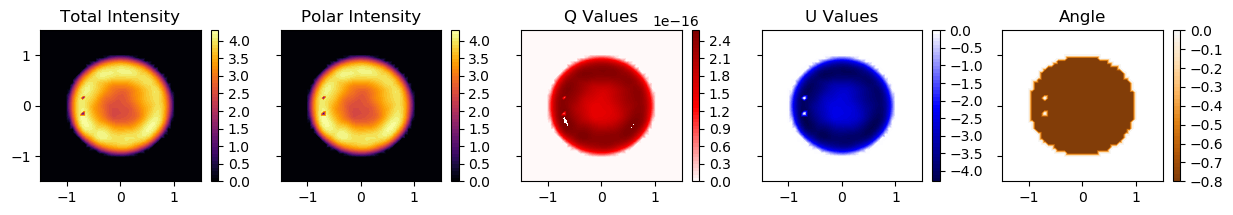

Delta time :  102.87721347808838


In [6]:
def test_field_45_t(x,y,z):
    return np.zeros_like(x),np.ones_like(x),np.ones_like(x)

def intensity_field_45_table(x,y,z):
    return 2*x**2 + 2*y**2 + 2*z**2

x_tab_val = np.random.uniform(-2,2,3000)
y_tab_val = np.random.uniform(-2,2,3000)
z_tab_val = np.random.uniform(-2,2,3000)
ans_tab_val = intensity_field_45_table(x_tab_val,y_tab_val,z_tab_val)
intensity_table = d_systize.InterpolationTable(x_tab_val,y_tab_val,z_tab_val,'scalar',scalar_ans=ans_tab_val)


target_object_45 = m_obs.ProtostarModel(center_coord,cloud_eq,test_field_45_t,density_model=intensity_table,
                                        zeros_guess_count=n_zeros,polarization_model=1)
target_sightline_45 = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_45 = m_obs.ObservingRun(target_object_45,target_sightline_45,3)

start_time = time.time()
_ = telescope_data_45.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

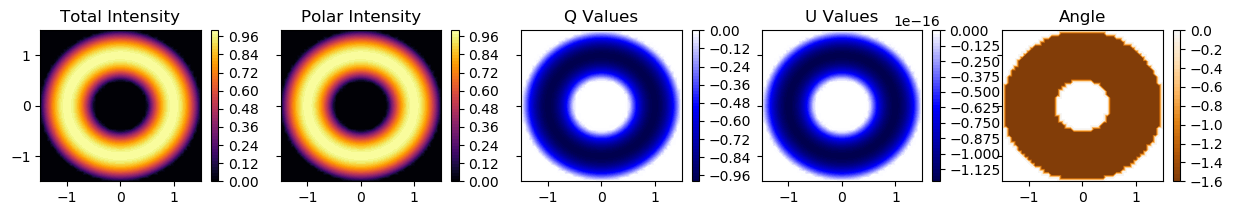

Delta time :  91.87658381462097


In [7]:
def test_field_90(x,y,z):
    return 0,1,0

def cloud_eq_x(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(y**2 + z**2) - R)**2 + x**2 - r**2

x_tab_val = np.random.uniform(-2,2,3000)
y_tab_val = np.random.uniform(-2,2,3000)
z_tab_val = np.random.uniform(-2,2,3000)
Bfield_table = d_systize.InterpolationTable(x_tab_val,y_tab_val,z_tab_val,'vector',
                                            x_vector_ans=np.zeros_like(x_tab_val),
                                            y_vector_ans=np.ones_like(x_tab_val),
                                            z_vector_ans=np.zeros_like(x_tab_val))

target_object_90 = m_obs.ProtostarModel(center_coord,cloud_eq_x,test_field_90,
                                        zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_90 = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_90 = m_obs.ObservingRun(target_object_90,target_sightline_90,3)

start_time = time.time()
_ = telescope_data_90.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

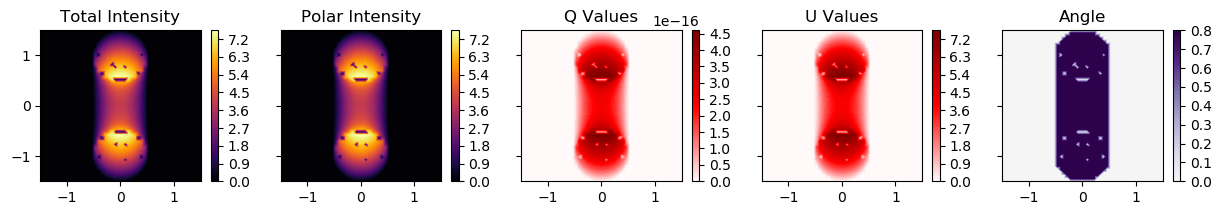

Delta time :  125.71987390518188


In [8]:
def test_field_135(x,y,z):
    return 0,-1,1

def cloud_eq_y(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(x**2 + z**2) - R)**2 + y**2 - r**2

target_object_135 = m_obs.ProtostarModel(center_coord,cloud_eq_y,test_field_135,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_135 = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_135 = m_obs.ObservingRun(target_object_135,target_sightline_135,3)

start_time = time.time()
_ = telescope_data_135.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

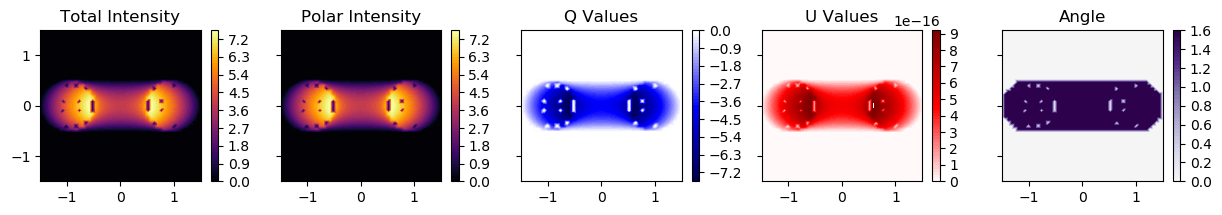

Delta time :  118.65695452690125


In [9]:
def test_field_180(x,y,z):
    return 0,-1,0

def cloud_eq_z(x,y,z):
    R = 1
    r = 0.5
    return (np.sqrt(x**2 + y**2) - R)**2 + z**2 - r**2

target_object_180 = m_obs.ProtostarModel(center_coord,cloud_eq_z,test_field_180,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_180 = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_180 = m_obs.ObservingRun(target_object_180,target_sightline_180,3)

start_time = time.time()
_ = telescope_data_180.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

## Talk Plots

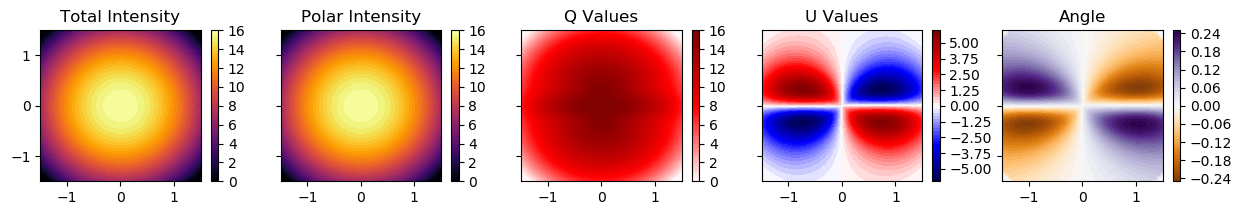

Delta time :  801.7674322128296


In [10]:
def test_field_hg(x,y,z):
    return mag_field(x,y,z)

def cloud_eq_hg(x,y,z):
    #R = 1
    #r = 0.5
    #return (np.sqrt(x**2 + y**2) - R)**2 + z**2 - r**2
    return x**2 + y**2 + z**2 - 4

target_object_hg = m_obs.ProtostarModel(center_coord,cloud_eq_hg,test_field_hg,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_hg = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_hg = m_obs.ObservingRun(target_object_hg,target_sightline_hg,3)

start_time = time.time()
_ = telescope_data_hg.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

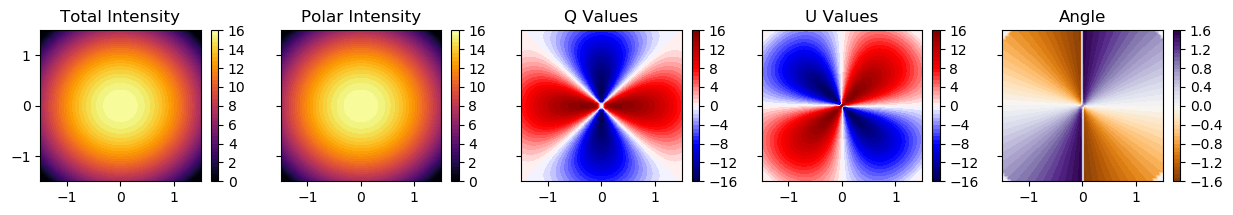

Delta time :  53.87304162979126


In [11]:
def cloud_eq_cr(x,y,z):
    return x**2 + y**2 + z**2 - 4

def test_field_cr(x,y,z):
    return mff3d.circular_magnetic_field_cart_3d(x, y, z,
                                                 center=[0, 0, 0],
                                                 mag_function=lambda r: 1/r**2,
                                                 curl_axis='x')


target_object_cr = m_obs.ProtostarModel(center_coord,cloud_eq_cr,test_field_cr,
                                         zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_cr = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_cr = m_obs.ObservingRun(target_object_cr,target_sightline_cr,3)

start_time = time.time()
_ = telescope_data_cr.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

C:\Users\psmdi\Desktop\SINNOH\Research\Dust_Scattering_Polarization_Modeling\Codebase\Active_Codebase\magnetic_field_functions_3d.py:376: PhysicsWarning: Magnetic monopole fields are considered as non-physical by Maxwell's equations.    --Kyubey
  ('Magnetic monopole fields are considered as '


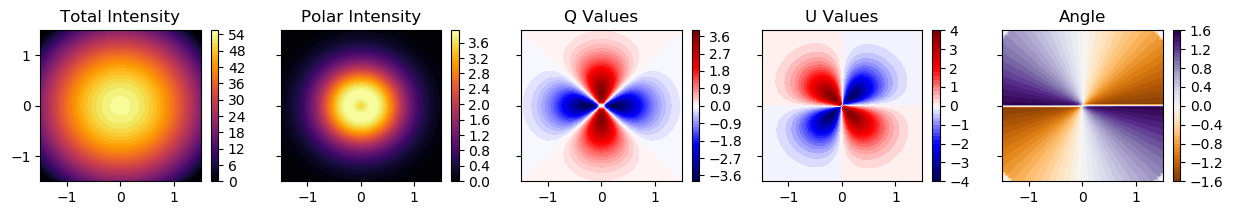

Delta time :  93.26018524169922


In [12]:
def test_field_rad(x,y,z):
    return mff3d.monopole_magnetic_field_cart_3d(x, y, z,
                                                 center = [0,0,0],
                                                 mag_function=lambda r: 1/r**2)

def cloud_eq_rad(x,y,z):
    #R = 1
    #r = 0.5
    #return (np.sqrt(x**2 + y**2) - R)**2 + z**2 - r**2
    return x**2 + y**2 + z**2 - 4

def density_rad(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    r_max = 2
    R_val = 3.8918
    return r_max / (1 + r**2 / R_val**2)

def polarization_rad(x,y,z):
    # A wien approximation-like function
    a = 10
    b = 5
    n = 2
    r = np.sqrt(x**2 + y**2 + z**2)
    return a * r**n * np.exp(-b * r)
    

target_object_rad = m_obs.ProtostarModel(center_coord,cloud_eq_rad,test_field_rad,
                                        density_model=density_rad, polarization_model=polarization_rad,
                                        zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_rad = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_rad = m_obs.ObservingRun(target_object_rad,target_sightline_rad,3)

start_time = time.time()
_ = telescope_data_rad.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

C:\Users\psmdi\Desktop\SINNOH\Research\Dust_Scattering_Polarization_Modeling\Codebase\Active_Codebase\magnetic_field_functions_3d.py:376: PhysicsWarning: Magnetic monopole fields are considered as non-physical by Maxwell's equations.    --Kyubey
  ('Magnetic monopole fields are considered as '


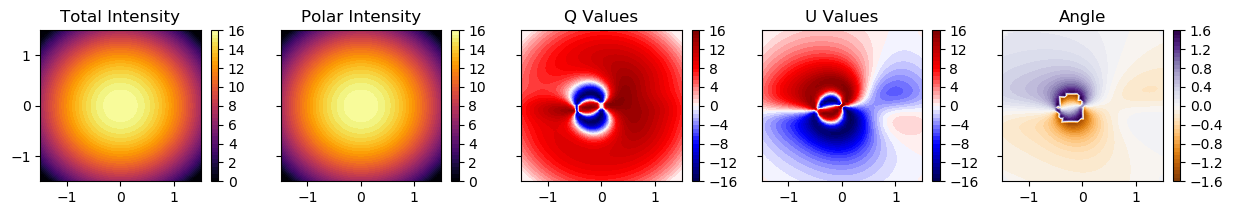

Delta time :  1096.4916594028473


In [13]:
def cloud_eq_comb(x,y,z):
    return x**2 + y**2 + z**2 - 4

def test_field_comb(x,y,z):
    hg = 1
    cr = 1
    rad = 1
    mag_funt = lambda r: 1/r**2
    norm = hg+cr+rad
    return ((hg/norm)*np.array(test_field_hg(x,y,z))
             + (cr/norm)*np.array(test_field_cr(x,y,z))
             + (rad/norm)*np.array(test_field_rad(x,y,z)))

target_object_comb = m_obs.ProtostarModel(center_coord,cloud_eq_comb,test_field_comb,
                                        #density_model=density_comb, polarization_model=polarization_comb,
                                        zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_comb = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_comb = m_obs.ObservingRun(target_object_comb,target_sightline_comb,3)

start_time = time.time()
_ = telescope_data_comb.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

C:\Users\psmdi\Desktop\SINNOH\Research\Dust_Scattering_Polarization_Modeling\Codebase\Active_Codebase\magnetic_field_functions_3d.py:376: PhysicsWarning: Magnetic monopole fields are considered as non-physical by Maxwell's equations.    --Kyubey
  ('Magnetic monopole fields are considered as '


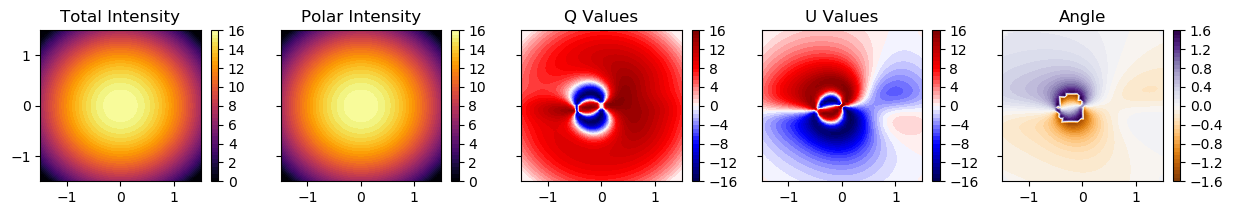

Delta time :  1249.1683413982391


In [19]:
def cloud_eq_comps(x,y,z):
    return x**2 + y**2 + z**2 - 4

keyword_parameters = {'h' : 0.3257,
    'k_array' : [0.9549,0.4608,0.6320],
    'disk_radius' : 3.8918,
    'uniform_B0' : 3.3118,
    'center' : [0,0,0],
    'mag_function' : lambda r: 1/r**2,
    'curl_axis':'x'} 

funt_list = [mff3d.hourglass_magnetic_field_cart_3d,mff3d.circular_magnetic_field_cart_3d,mff3d.monopole_magnetic_field_cart_3d]
contri = [1,1,1]

composite_funt = mff3d.linear_combination_magnetic_field(funt_list,contri,**keyword_parameters)

target_object_comps = m_obs.ProtostarModel(center_coord,cloud_eq_comps,composite_funt,
                                        #density_model=density_comps, polarization_model=polarization_comps,
                                        zeros_guess_count=n_zeros,ra_wrap_angle=np.pi)
target_sightline_comps = m_obs.Sightline(None,None,SkyCoord_object=center_coord,ra_wrap_angle=np.pi)
telescope_data_comps = m_obs.ObservingRun(target_object_comps,target_sightline_comps,3)

start_time = time.time()
_ = telescope_data_comps.Stokes_parameter_contours(n_axial_samples=50)
end_time = time.time()
print('Delta time : ', end_time - start_time)

## Big Braking!

In [15]:
# %lprun -f telescope_data.Stokes_parameter_contours telescope_data.Stokes_parameter_contours(n_samples=10000)
#axes,stokes = telescope_data.Stokes_parameter_contours(n_samples=10000)

In [16]:
# Speckle testing
#axes,stokes = telescope_data.Stokes_parameter_contours(n_samples=10000)

## Testing!

In [17]:
test_coord = ay_coord.SkyCoord('12h00m01.00s','00d00m00.00s',frame='icrs')
print(test_coord.ra,test_coord.dec)
print(test_coord.ra.wrap_angle)
test_coord.ra.wrap_angle = ay_u.rad * np.pi
print(test_coord.ra,test_coord.dec)
print(test_coord.ra.wrap_angle)


180d00m15s 0d00m00s
360d00m00s
-179d59m45s 0d00m00s
3.14159rad
